# Emotion detection using Deep Learning
## By: Kirti Agarwal and Karan Kakadiya

## Installing Libraries

In [4]:
pip install keras

  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
conda install -c conda-forge keras-preprocessing

^C

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install Keras-Preprocessing

  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install TensorFlow

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\RAKESH\anaconda3

  added / updated specs:
    - keras-preprocessing


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.12.7  |       h5b45459_0         143 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    keras-preprocessing-1.1.2  |     pyhd8ed1ab_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         325 KB

The following NEW packages will be INSTALLED:

  keras-preprocessi~ conda-forge/noarch::keras-preprocessing-1.1.2-pyhd8ed1ab_0 

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2023.01.10~ --> conda-forge::ca-certificates-2022.12.7-h5b45459_0 
  certifi

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\rakesh\\anaconda3\\lib\\site-packages\\certifi-2022.12.7.dist-info\\METADATA'



In [7]:
pip install livelossplot

  Using cached livelossplot-0.5.5-py3-none-any.whl (22 kB)
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer
import nltk
import re
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, GRU, LSTM, Bidirectional, Embedding, Dropout
from keras.callbacks import ModelCheckpoint
from livelossplot.tf_keras import PlotLossesCallback
from livelossplot import PlotLossesKeras

In [2]:
# Loading the dataset
def load_dataset(filename):
  df = pd.read_csv(filename)
  label = df["label"]
  unique_label = list(set(label))
  sentences = list(df["text"])
  
  return (df, label, unique_label, sentences)

In [3]:
df, label, unique_label, sentences = load_dataset(r'D:\adypu\INTERSHIP\project\adani twitter\emotionsentiment\emotion.csv')

In [4]:
df.head()

,label,text,Unnamed: 2
0,joy,On days when I feel close to my partner and ot...,NaN
1,fear,Every time I imagine that someone I love or I ...,NaN
2,anger,When I had been obviously unjustly treated and...,NaN
3,sadness,When I think about the short time that we live...,NaN
4,disgust,At a gathering I found myself involuntarily si...,NaN


In [5]:
unique_label = list(set(label))
print(unique_label)

['sadness', 'guilt', 'disgust', 'fear', 'joy', 'shame', 'anger']


<Axes: xlabel='label', ylabel='count'>

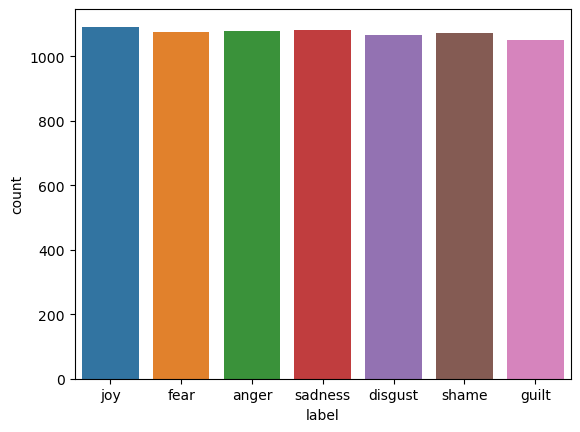

In [6]:
import seaborn as sns
import tkinter
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x="label", data=df)

In [7]:
print(sentences[:5])

['On days when I feel close to my partner and other friends.   \nWhen I feel at peace with myself and also experience a close  \ncontact with people whom I regard greatly.', 'Every time I imagine that someone I love or I could contact a  \nserious illness, even death.', 'When I had been obviously unjustly treated and had no possibility  \nof elucidating this.', 'When I think about the short time that we live and relate it to  \nthe periods of my life when I think that I did not use this  \nshort time.', 'At a gathering I found myself involuntarily sitting next to two  \npeople who expressed opinions that I considered very low and  \ndiscriminating.']


## Data transformation

In [42]:
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [8]:
#define stemmer
stemmer = LancasterStemmer()

In [9]:
def cleaning(sentences):
  words = []
  for s in sentences:
    clean = re.sub(r'[^ a-z A-Z 0-9]', " ", s)
    w = word_tokenize(clean)
    words.append([i.lower() for i in w])
    
  return words 

In [10]:
cleaned_words = cleaning(sentences)
print(len(cleaned_words))
print(cleaned_words[:2])  

7516
[['on', 'days', 'when', 'i', 'feel', 'close', 'to', 'my', 'partner', 'and', 'other', 'friends', 'when', 'i', 'feel', 'at', 'peace', 'with', 'myself', 'and', 'also', 'experience', 'a', 'close', 'contact', 'with', 'people', 'whom', 'i', 'regard', 'greatly'], ['every', 'time', 'i', 'imagine', 'that', 'someone', 'i', 'love', 'or', 'i', 'could', 'contact', 'a', 'serious', 'illness', 'even', 'death']]


In [11]:
def create_tokenizer(words, filters = '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~'):
  token = Tokenizer(filters = filters)
  token.fit_on_texts(words)
  return token

In [12]:
def max_length(words):
  return(len(max(words, key = len)))

In [13]:
word_tokenizer = create_tokenizer(cleaned_words)
vocab_size = len(word_tokenizer.word_index) + 1
max_length = max_length(cleaned_words)

print("Vocab Size = %d and Maximum length = %d" % (vocab_size, max_length))

Vocab Size = 8989 and Maximum length = 179


In [14]:
def encoding_doc(token, words):
  return(token.texts_to_sequences(words))

In [15]:
encoded_doc = encoding_doc(word_tokenizer, cleaned_words)

In [16]:
def padding_doc(encoded_doc, max_length):
  return(pad_sequences(encoded_doc, maxlen = max_length, padding = "post"))

In [17]:
padded_doc = padding_doc(encoded_doc, max_length)

In [18]:
print("Shape of padded docs = ",padded_doc.shape)

Shape of padded docs =  (7516, 179)


In [19]:
#tokenizer with filter changed
output_tokenizer = create_tokenizer(unique_label, filters = '!"#$%&()*+,-/:;<=>?@[\]^`{|}~')

In [20]:
output_tokenizer.word_index

{'sadness': 1,
 'guilt': 2,
 'disgust': 3,
 'fear': 4,
 'joy': 5,
 'shame': 6,
 'anger': 7}

In [21]:
encoded_output = encoding_doc(output_tokenizer, label)

In [22]:
encoded_output = np.array(encoded_output).reshape(len(encoded_output), 1)

In [23]:
encoded_output.shape

(7516, 1)

In [24]:
def one_hot(encode):
  o = OneHotEncoder(sparse = False)
  return(o.fit_transform(encode))

In [25]:
output_one_hot = one_hot(encoded_output)

C:\Users\RAKESH\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
output_one_hot.shape

(7516, 7)

## Model Training

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
train_X, val_X, train_Y, val_Y = train_test_split(padded_doc, output_one_hot, shuffle = True, test_size = 0.2)

In [29]:
print("Shape of train_X = %s and train_Y = %s" % (train_X.shape, train_Y.shape))
print("Shape of val_X = %s and val_Y = %s" % (val_X.shape, val_Y.shape))

Shape of train_X = (6012, 179) and train_Y = (6012, 7)
Shape of val_X = (1504, 179) and val_Y = (1504, 7)


In [30]:
def create_model(vocab_size, max_length):
  model = Sequential()
  model.add(Embedding(vocab_size, 128, input_length = max_length, trainable = False))
  model.add(Bidirectional(GRU(128)))
  model.add(Dense(32, activation = "relu"))
  model.add(Dropout(0.5))
  model.add(Dense(7, activation = "softmax"))
  
  return model

In [35]:
model = create_model(vocab_size, max_length)

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 179, 128)          1150592   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              198144    
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                8224      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 231       
                                                                 
Total params: 1,357,191
Trainable params: 206,599
Non-trainable params: 1,150,592
________________________________________

In [67]:
filename = 'model.h5'
checkpoint = ModelCheckpoint(filename,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

In [68]:
hist = model.fit(train_X, train_Y,
                 epochs = 100,
                 batch_size = 32,
                 validation_data = (val_X, val_Y),
                 callbacks = [PlotLossesKeras(), checkpoint])

Epoch 1/100
 14/188 [=>............................] - ETA: 2:14 - loss: 1.9494 - accuracy: 0.1317

KeyboardInterrupt: 

In [37]:
def create_model(vocab_size, max_length):
  model = Sequential()
  model.add(Embedding(vocab_size, 128, input_length = max_length, trainable = False))
  model.add(Bidirectional(LSTM(128)))
  model.add(Dense(32, activation = "relu"))
  model.add(Dropout(0.5))
  model.add(Dense(7, activation = "softmax"))
  
  return model

model_lstm = create_model(vocab_size, max_length)

model_lstm.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 179, 128)          1150592   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                8224      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 231       
                                                                 
Total params: 1,422,215
Trainable params: 271,623
Non-trainable params: 1,150,592
________________________________________

In [ ]:
filename = 'model_lstm.h5'
checkpoint = ModelCheckpoint(filename,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

hist = model_lstm.fit(train_X, train_Y,
                 epochs = 100,
                 batch_size = 32,
                 validation_data = (val_X, val_Y),
                 callbacks = [PlotLossesKeras(), checkpoint])

In [ ]:
model = load_model("model_lstm.h5")

## Prediction of Emotion

In [36]:
def predictions(text):
  clean = re.sub(r'[^ a-z A-Z 0-9]', " ", text)
  test_word = word_tokenize(clean)
  test_word = [w.lower() for w in test_word]
  test_ls = word_tokenizer.texts_to_sequences(test_word)

  if [] in test_ls:
    test_ls = list(filter(None, test_ls))
    
  test_ls = np.array(test_ls).reshape(1, len(test_ls))
  x = padding_doc(test_ls, max_length)

  pred = model.predict(x)
  
  return pred

In [37]:
def get_final_output(pred, classes):
  predictions = pred[0]
  classes = np.array(classes)
  ids = np.argsort(-predictions)
  classes = classes[ids]
  predictions = -np.sort(-predictions)
 
  for i in range(pred.shape[1]):
    print("%s has confidence = %s" % (classes[i], (predictions[i])))
  
  return classes[0]

In [38]:
def get_emotion(text):
    pred = predictions(text)
    result = get_final_output(pred, unique_label)
    print('\nans: {}\n'.format(result))

In [39]:
get_emotion("I did not help out enough at my thesis team.")

1/1 [==============================] - 1s 1s/step
anger has confidence = 0.14649513
fear has confidence = 0.14579144
disgust has confidence = 0.1448504
joy has confidence = 0.14220335
guilt has confidence = 0.14214952
sadness has confidence = 0.14000422
shame has confidence = 0.13850592

ans: anger



## Tkinter GUI

In [41]:
import tkinter as tk


def get_emotion():
    text = input_box.get("1.0", "end-1c")
    pred = predictions(text)
    result = get_final_output(pred, unique_label)
    output_window = tk.Toplevel(window)
    output_window.title("Emotion Detected")
    output_label = tk.Label(output_window, text=result)
    output_label.pack()

# Create GUI window
window = tk.Tk()
window.title("Emotion Detection")

# Create input box
input_box = tk.Text(window, height=10, width=50)
input_box.pack()

# Create button
button = tk.Button(window, text="Detect Emotion", command=get_emotion)
button.pack()

# Start GUI
window.mainloop()


1/1 [==============================] - 0s 47ms/step
fear has confidence = 0.1461465
joy has confidence = 0.14463592
disgust has confidence = 0.14324184
sadness has confidence = 0.14227454
anger has confidence = 0.1419598
guilt has confidence = 0.14137289
shame has confidence = 0.14036849
